In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-data/weather_data.csv


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [6]:
df = pd.read_csv("/kaggle/input/weather-data/weather_data.csv")

In [7]:
df

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331
...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,No Rain,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,No Rain,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,Rain,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,No Rain,94.067925,1047.153269


In [8]:
df.describe()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,296.000000,296.000000,296.000000,296.000000,311.000000
mean,25.983840,55.041385,7.556636,49.834827,1001.059119
std,6.802475,19.220133,5.344683,29.009459,28.835595
min,15.000000,30.000000,0.069480,0.321826,951.240404
25%,20.265692,34.280826,3.550354,24.530951,975.757545
50%,27.177958,56.759806,7.326421,50.725120,1001.938586
75%,32.204599,72.189837,11.050627,76.046506,1026.578884
max,35.000000,90.000000,56.636041,99.834751,1049.543752


In [9]:
df.dtypes

date                object
avg_temperature    float64
humidity           float64
avg_wind_speed     float64
rain_or_not         object
cloud_cover        float64
pressure           float64
dtype: object

In [10]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [11]:
df = df.set_index('date')

In [12]:
df["rain_or_not"].unique()

array(['Rain', 'No Rain'], dtype=object)

In [13]:
df['rain_or_not'] = df['rain_or_not'].map({'Rain' : 1, 'No Rain' : 0})

In [14]:
df.isnull().sum()

avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

In [15]:
df[df["avg_temperature"].isna()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
date,,,,,,
2023-01-13,NaN,NaN,NaN,0,NaN,1022.950823
2023-01-16,NaN,NaN,NaN,1,NaN,1011.022515
2023-01-17,NaN,NaN,NaN,0,NaN,963.535408
2023-02-14,NaN,NaN,NaN,1,NaN,1006.016818
2023-02-17,NaN,NaN,NaN,1,NaN,991.879332
2023-02-22,NaN,NaN,NaN,0,NaN,1015.417460
2023-02-27,NaN,NaN,NaN,1,NaN,1010.852727
2023-03-13,NaN,NaN,NaN,0,NaN,1004.353822
2023-04-22,NaN,NaN,NaN,1,NaN,1032.210316


In [16]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])

for col in ['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure', 'cloud_cover']:
    remove_outliers_iqr(df, col)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: Ru

In [17]:
df['avg_temperature'] = df['avg_temperature'].fillna(df['avg_temperature'].rolling(window=7, min_periods=1).mean())
df['humidity'] = df['humidity'].fillna(df['humidity'].rolling(window=7, min_periods=1).mean())
df['avg_wind_speed'] = df['avg_wind_speed'].fillna(df['avg_wind_speed'].rolling(window=7, min_periods=1).mean())
df['cloud_cover'] = df['cloud_cover'].fillna(df['cloud_cover'].rolling(window=7, min_periods=1).mean())


In [ ]:
plt.figure(figsize=(12, 6)) 
lot = plt.plot(df.index, df['rain_or_not'], alpha=0.7)

plt.xlabel("Time")  
plt.ylabel("Rain or Not")  
plt.title("Rain Prediction Over Time")  
plt.show()  

In [ ]:
# Define features to plot
features = {
    "avg_temperature": "Avg Temperature (°C)",
    "humidity": "Humidity (%)",
    "avg_wind_speed": "Avg Wind Speed (km/h)",
    "pressure": "Pressure",
    "cloud_cover": "Cloud Cover"
}
colors = ["red", "blue", "green", "purple", "orange"]

fig, axes = plt.subplots(len(features), 1, figsize=(12, 15), sharex=True)

for i, (feature, label) in enumerate(features.items()):
    axes[i].plot(df.index, df[feature], label=label, color=colors[i], alpha=0.7)
    
    # Highlight rainy days
    rainy_days = df[df['rain_or_not'] == 1].index
    for day in rainy_days:
        axes[i].axvline(day, color='gray', linestyle='dashed', alpha=0.4)  # Vertical line for rain
    
    axes[i].set_ylabel(label)
    axes[i].legend()
    axes[i].grid(True)

# Label x-axis only on the last subplot
axes[-1].set_xlabel("Date")

fig.suptitle("Weather Feature Variations Over Time", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# # Sort by date (just in case)
# df = df.sort_values(by='date')

# # --- Line Plot of Features Over Time ---
# plt.figure(figsize=(12, 6))

# # Plot temperature, humidity, and wind speed over time
# plt.plot(df['date'], df['avg_temperature'], label='Avg Temperature (°C)', color='red', alpha=0.7)
# plt.plot(df['date'], df['humidity'], label='Humidity (%)', color='blue', alpha=0.7)
# plt.plot(df['date'], df['avg_wind_speed'], label='Avg Wind Speed (km/h)', color='green', alpha=0.7)
# plt.plot(df['date'], df['pressure'], label='Pressure', color='pink', alpha=0.7)
# plt.plot(df['date'], df['cloud_cover'], label='Cloud Cover', color='brown', alpha=0.7)

# # Highlight rainy days
# rainy_days = df[df['rain_or_not'] == 1]['date']
# for day in rainy_days:
#     plt.axvline(day, color='gray', linestyle='dashed', alpha=0.4)  # Vertical lines for rainy days

# plt.xlabel("Date")
# plt.ylabel("Feature Value")
# plt.title("Weather Feature Variations Over Time")
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

# # --- Rolling Average to Smooth Variations ---
# df['temp_rolling'] = df['avg_temperature'].rolling(window=7).mean()
# df['humidity_rolling'] = df['humidity'].rolling(window=7).mean()
# df['wind_rolling'] = df['avg_wind_speed'].rolling(window=7).mean()
# df['pressure_rolling'] = df['pressure'].rolling(window=7).mean()
# df['cloud_cover_rolling'] = df['cloud_cover'].rolling(window=7).mean()


# plt.figure(figsize=(12, 6))

# plt.plot(df['date'], df['temp_rolling'], label='Avg Temperature (7-day rolling mean)', color='red', linewidth=2)
# plt.plot(df['date'], df['humidity_rolling'], label='Humidity (7-day rolling mean)', color='blue', linewidth=2)
# plt.plot(df['date'], df['wind_rolling'], label='Avg Wind Speed (7-day rolling mean)', color='green', linewidth=2)
# # plt.plot(df['date'], df['pressure_rolling'], label='Pressure (7-day rolling mean)', color='pink', linewidth=2)
# plt.plot(df['date'], df['cloud_cover_rolling'], label='Avg Cloud Cover (7-day rolling mean)', color='brown', linewidth=2)

# plt.xlabel("Date")
# plt.ylabel("Smoothed Feature Value")
# plt.title("Smoothed Weather Feature Trends Over Time (7-day Rolling Average)")
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 5, figsize=(18, 5))
features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure', 'cloud_cover']

for i, feature in enumerate(features):
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

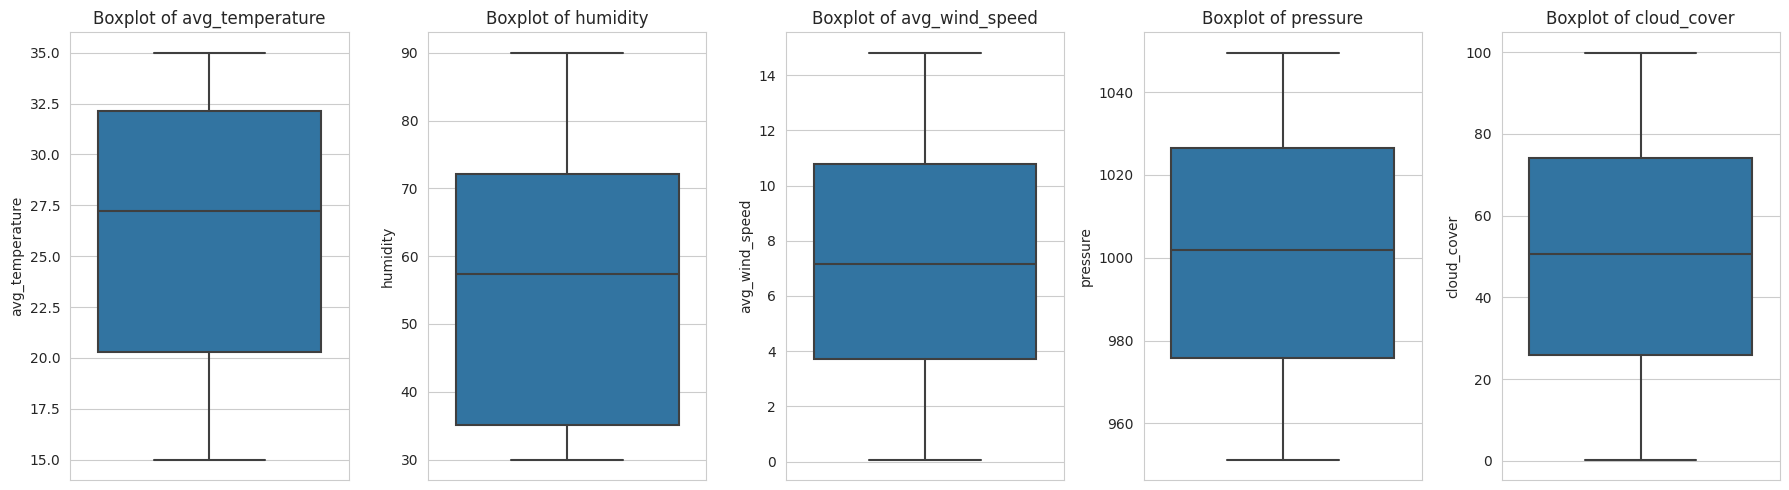

In [22]:
fig, axes = plt.subplots(1, 5, figsize=(18, 5))
features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure', 'cloud_cover']

for i, feature in enumerate(features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

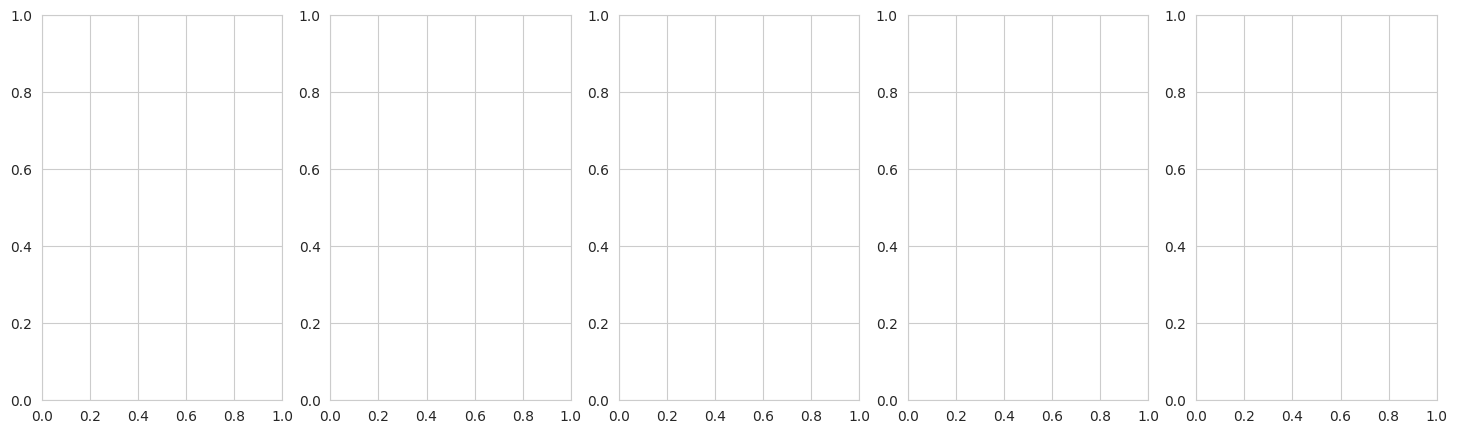

In [23]:
fig, axes = plt.subplots(1, 5, figsize=(18, 5))
features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure', 'cloud_cover']

sns.pairplot(df[features + ['rain_or_not']], hue="rain_or_not", palette={0: "blue", 1: "orange"})
plt.show()

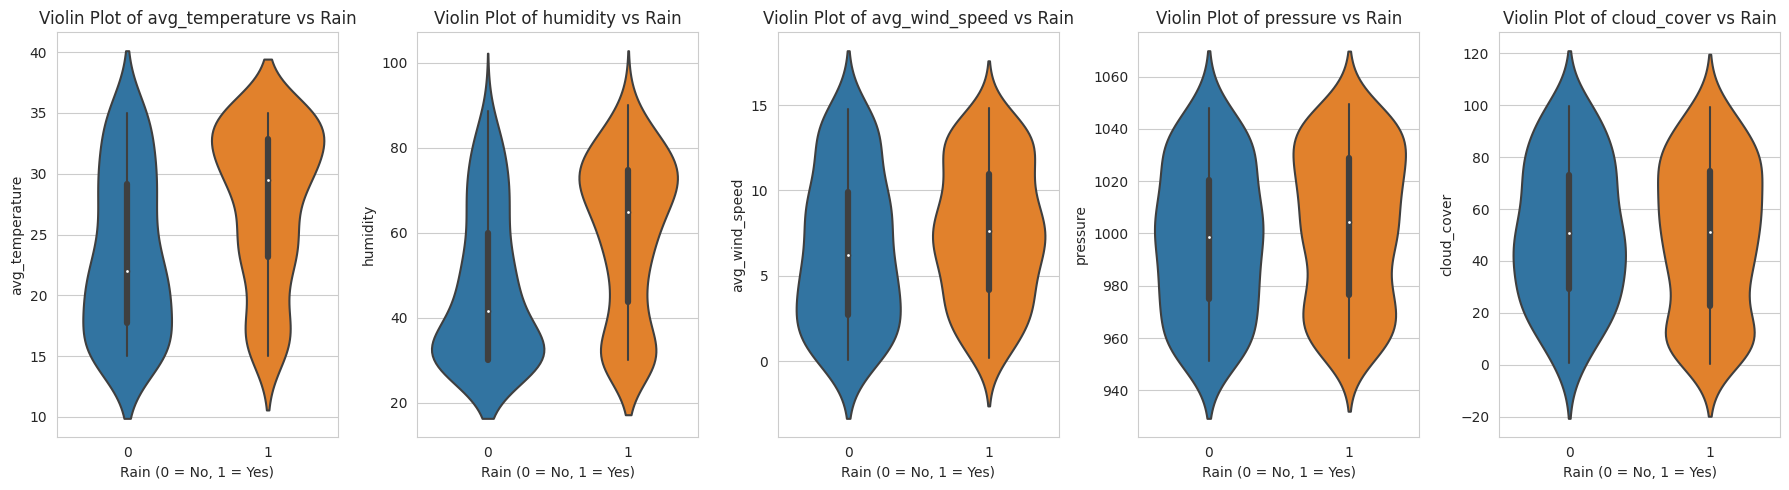

In [24]:
fig, axes = plt.subplots(1, 5, figsize=(18, 5))
features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure', 'cloud_cover']

for i, feature in enumerate(features):
    sns.violinplot(x=df['rain_or_not'], y=df[feature], ax=axes[i])
    axes[i].set_title(f"Violin Plot of {feature} vs Rain")
    axes[i].set_xlabel("Rain (0 = No, 1 = Yes)")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

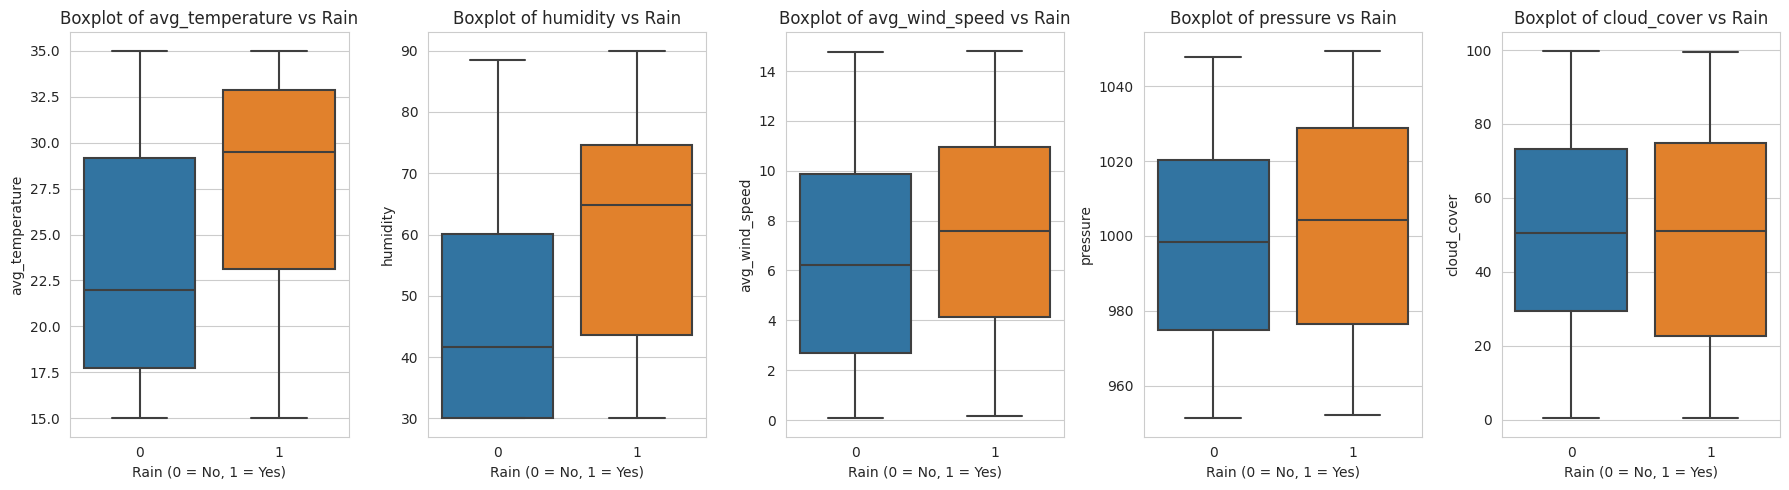

In [25]:
fig, axes = plt.subplots(1, 5, figsize=(18, 5))
features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure', 'cloud_cover']

for i, feature in enumerate(features):
    sns.boxplot(x=df['rain_or_not'], y=df[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature} vs Rain")
    axes[i].set_xlabel("Rain (0 = No, 1 = Yes)")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

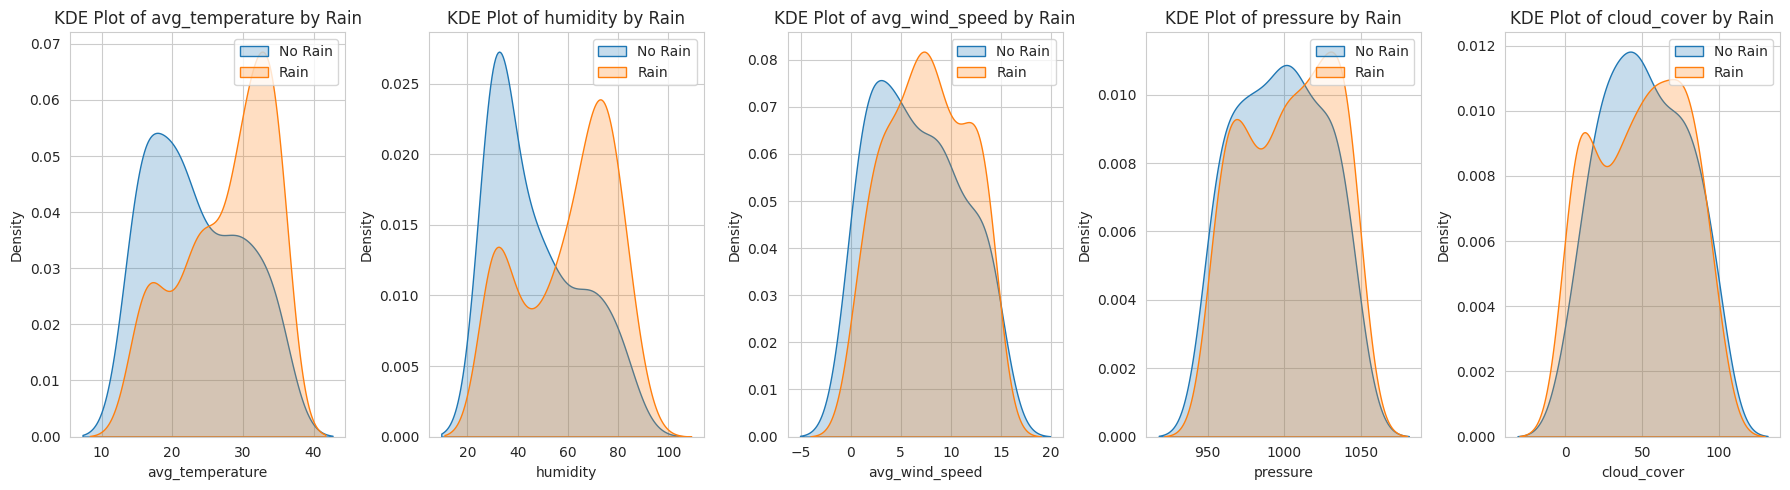

In [26]:
fig, axes = plt.subplots(1, 5, figsize=(18, 5))
features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure', 'cloud_cover']

for i, feature in enumerate(features):
    sns.kdeplot(df[df['rain_or_not'] == 0][feature], label="No Rain", fill=True, ax=axes[i])
    sns.kdeplot(df[df['rain_or_not'] == 1][feature], label="Rain", fill=True, ax=axes[i])
    axes[i].set_title(f"KDE Plot of {feature} by Rain")
    axes[i].set_xlabel(feature)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [27]:
X = df.copy()
y = X.pop("rain_or_not")

discrete_features = X.dtypes == int

In [28]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores 

humidity           0.032096
avg_temperature    0.031329
pressure           0.020196
avg_wind_speed     0.000000
cloud_cover        0.000000
Name: MI Scores, dtype: float64

<Axes: >

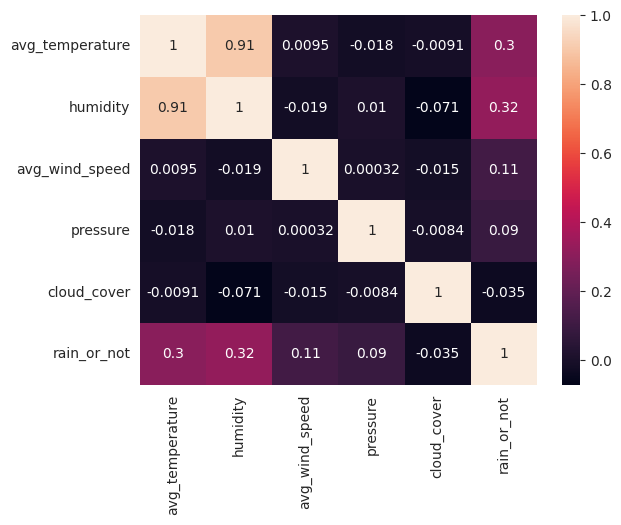

In [29]:
features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure', 'cloud_cover', 'rain_or_not']

df_corr = df[features].dropna().corr()
sns.heatmap(df_corr, annot=True)

In [30]:
for lag in range(1, 8):
    df[f'rain_lag_{lag}'] = df['rain_or_not'].shift(lag)
    df[f'temp_lag_{lag}'] = df['avg_temperature'].shift(lag)
    df[f'hum_lag_{lag}'] = df['humidity'].shift(lag)
df.dropna(inplace=True)

In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error,classification_report

In [32]:
X = df.drop(columns=['rain_or_not'])
y = df['rain_or_not']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [33]:
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42, eval_metric="logloss" )
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)


[0]	validation_0-logloss:0.65126	validation_1-logloss:0.64099
[1]	validation_0-logloss:0.64021	validation_1-logloss:0.63607
[2]	validation_0-logloss:0.62996	validation_1-logloss:0.63231
[3]	validation_0-logloss:0.62046	validation_1-logloss:0.62976
[4]	validation_0-logloss:0.61030	validation_1-logloss:0.63056
[5]	validation_0-logloss:0.60185	validation_1-logloss:0.62629
[6]	validation_0-logloss:0.59313	validation_1-logloss:0.62703
[7]	validation_0-logloss:0.58564	validation_1-logloss:0.62609
[8]	validation_0-logloss:0.57827	validation_1-logloss:0.62816
[9]	validation_0-logloss:0.57079	validation_1-logloss:0.62748
[10]	validation_0-logloss:0.56386	validation_1-logloss:0.62625
[11]	validation_0-logloss:0.55734	validation_1-logloss:0.62702
[12]	validation_0-logloss:0.55111	validation_1-logloss:0.62583
[13]	validation_0-logloss:0.54536	validation_1-logloss:0.62594
[14]	validation_0-logloss:0.53962	validation_1-logloss:0.62758
[15]	validation_0-logloss:0.53411	validation_1-logloss:0.62777
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [34]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nXG Boosting Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6885

XG Boosting Report:
               precision    recall  f1-score   support

           0       0.67      0.19      0.30        21
           1       0.69      0.95      0.80        40

    accuracy                           0.69        61
   macro avg       0.68      0.57      0.55        61
weighted avg       0.68      0.69      0.63        61



In [35]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter tuning for XGBClassifier
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],

}

# Create an XGBClassifier model
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters for XGBClassifier:", grid_search.best_params_)

# Using the best parameters found
best_xgb = grid_search.best_estimator_
best_xgb_pred = best_xgb.predict(X_test)
print("Optimized XGBClassifier Accuracy:", accuracy_score(y_test, best_xgb_pred))

# Classification report for the optimized model
print("\nOptimized XGBClassifier Report:\n", classification_report(y_test, best_xgb_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Optimized XGBClassifier Accuracy: 0.6721311475409836

Optimized XGBClassifier Report:
               precision    recall  f1-score   support

           0       0.57      0.19      0.29        21
           1       0.69      0.93      0.79        40

    accuracy                           0.67        61
   macro avg       0.63      0.56      0.54        61
weighted avg       0.65      0.67      0.61        61



In [36]:
model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42, eval_metric="logloss" )
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)


[0]	validation_0-logloss:0.63969	validation_1-logloss:0.63583
[1]	validation_0-logloss:0.61971	validation_1-logloss:0.62880
[2]	validation_0-logloss:0.60112	validation_1-logloss:0.63124
[3]	validation_0-logloss:0.58426	validation_1-logloss:0.62833
[4]	validation_0-logloss:0.56911	validation_1-logloss:0.62404
[5]	validation_0-logloss:0.55552	validation_1-logloss:0.62296
[6]	validation_0-logloss:0.54388	validation_1-logloss:0.62660
[7]	validation_0-logloss:0.53079	validation_1-logloss:0.61980
[8]	validation_0-logloss:0.52043	validation_1-logloss:0.61775
[9]	validation_0-logloss:0.51049	validation_1-logloss:0.61724
[10]	validation_0-logloss:0.50111	validation_1-logloss:0.61876
[11]	validation_0-logloss:0.49470	validation_1-logloss:0.61991
[12]	validation_0-logloss:0.48650	validation_1-logloss:0.61937
[13]	validation_0-logloss:0.48008	validation_1-logloss:0.62219
[14]	validation_0-logloss:0.47223	validation_1-logloss:0.62070
[15]	validation_0-logloss:0.46516	validation_1-logloss:0.61850
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [37]:
future_data = X.iloc[-1].values.reshape(1, -1)  
future_predictions = []
future_probabilities = []

for _ in range(21):
    prob = model.predict_proba(future_data)[0]  # Get probability for both classes
    pred = np.argmax(prob)  # Get the predicted class (0 or 1)
    
    future_predictions.append(pred)
    future_probabilities.append(prob[1])  # Store probability of rain (class 1)

    # Shift the features and append the new prediction
    future_data = np.append(future_data[:, 1:], pred).reshape(1, -1)

print("Predicted Rain (1) / No Rain (0) for next 21 days:", future_predictions)
print("Predicted Probability of Rain for next 21 days:", future_probabilities)


Predicted Rain (1) / No Rain (0) for next 21 days: [1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
Predicted Probability of Rain for next 21 days: [0.6501071, 0.95881474, 0.4508991, 0.9441404, 0.91692555, 0.4508991, 0.30180517, 0.64294046, 0.50397515, 0.17555025, 0.45689288, 0.43798736, 0.04008476, 0.22832991, 0.54581, 0.32945442, 0.46301514, 0.7302914, 0.10885965, 0.11615918, 0.37058008]


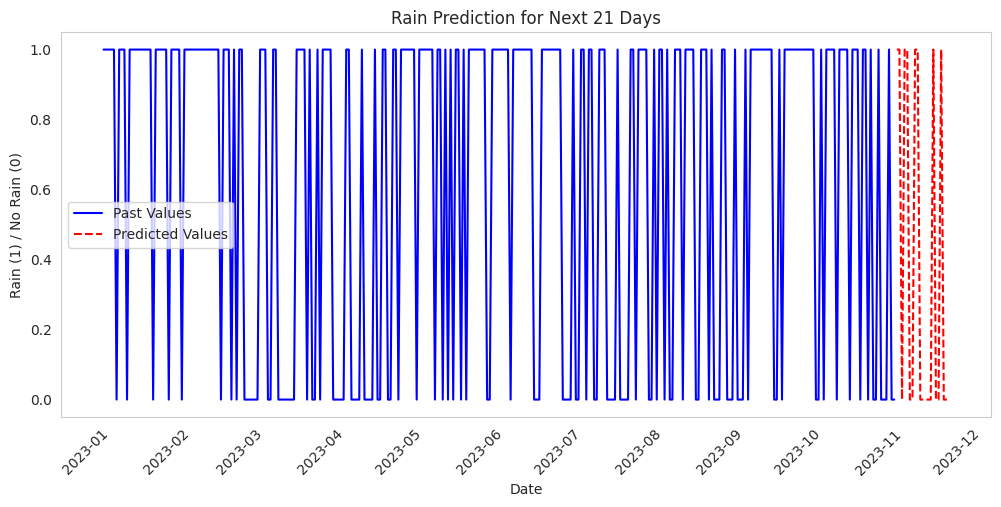

In [38]:
# Create future date range
future_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=21)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'date': future_dates, 'rain_or_not': future_predictions})
future_df.set_index('date')

# Append future predictions to the original DataFrame
df_combined = pd.concat([df, future_df], ignore_index=True)

# Plot historical and future predictions
plt.figure(figsize=(12,5))
plt.plot(df.index, df['rain_or_not'], label='Past Values', color='blue', linestyle='-')
plt.plot(future_df['date'], future_df['rain_or_not'], label='Predicted Values', color='red', linestyle='--')

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Rain (1) / No Rain (0)")
plt.title("Rain Prediction for Next 21 Days")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()
